### Jupyter Notebook "3-Kmeans_&_KNN":  
* 7-Imports.
     * 7.1-Import librerias necesarias.
     * 7.2-Import de DFs del Jupyter Notebook anterior.
* 8.-...

### 7-Imports.

### 7.1-Import librerias necesarias.

### 7.2-Import de DFs del Jupyter Notebook anterior.

Vamos a eliminar del DF: 
* 1 posición (HCM Consultant 2).
* 1 candidata (Data_Scientist_Karla_Lewis). 

Para luego predecir con estos ejemplos, y viendo qué funciones se deberían llamar.

In [28]:
import matplotlib.pyplot as  plt
import pandas as pd
import numpy as np
import string
import math

#Importamos el DF que exportamos previamente a csv en "Cleaning_DS_v2":
DF_Jobs_and_Candidates = pd.read_csv('DF_Exportado_Jobs_And_Candidates_own_model.csv')
DF_Jobs_and_Candidates.head()

,Candidate_Name,Content_CV,clean_Content_CV,tokens_Content_CV,Job_Title,Job_Description,clean_Job_Description,tokens_Job_Description,tfidf_cosine,WMD_Job_Desc
0,DataScientist_Karla_Lewis,\nKARLA LEWIS\nData Scientist\nCONTACT WORK EX...,data scientist brooklyn ny data scientist grub...,"['data_scientist', 'brooklyn', 'ny', 'data_sci...",Data Scientist,"Master’s degree or above in a STEM field, incl...",master degree stem field including limited com...,"['master', 'degree', 'stem', 'field', 'includi...",0.060513,0.898
1,DataScientist_Karla_Lewis,\nKARLA LEWIS\nData Scientist\nCONTACT WORK EX...,data scientist brooklyn ny data scientist grub...,"['data_scientist', 'brooklyn', 'ny', 'data_sci...",Data Scientist 2,"\nReporting to the Director, Data & Analytics,...",reporting director data analytics senior data ...,"['reporting', 'director', 'data', 'analytics',...",0.115418,0.903
2,DataScientist_Karla_Lewis,\nKARLA LEWIS\nData Scientist\nCONTACT WORK EX...,data scientist brooklyn ny data scientist grub...,"['data_scientist', 'brooklyn', 'ny', 'data_sci...",HCM Consultant,\nThe Oracle Cloud HCM Absence Consultant will...,oracle cloud hcm absence consultant responsibl...,"['oracle', 'cloud', 'hcm', 'absence', 'consult...",0.021795,0.884
3,DataScientist_Karla_Lewis,\nKARLA LEWIS\nData Scientist\nCONTACT WORK EX...,data scientist brooklyn ny data scientist grub...,"['data_scientist', 'brooklyn', 'ny', 'data_sci...",HCM Consultant 2,4+ years of experience in PeopleSoft or Oracle...,peoplesoft oracle eb implementation support hc...,"['peoplesoft', 'oracle', 'eb', 'implementation...",0.019523,0.905
4,DataScientist_Karla_Lewis,\nKARLA LEWIS\nData Scientist\nCONTACT WORK EX...,data scientist brooklyn ny data scientist grub...,"['data_scientist', 'brooklyn', 'ny', 'data_sci...",Machine Learning Engineer,Leveraging the latest machine and deep learnin...,leveraging latest machine deep learning techni...,"['leveraging', 'latest', 'machine', 'deep_lear...",0.051246,0.896


In [29]:
#Nos quedamos con las columnas necesarias:
DF_J_and_C = DF_Jobs_and_Candidates.loc[:, ['Candidate_Name', 'Job_Title', 'tfidf_cosine', 'WMD_Job_Desc']]
DF_J_and_C

,Candidate_Name,Job_Title,tfidf_cosine,WMD_Job_Desc
0,DataScientist_Karla_Lewis,Data Scientist,0.060513,0.898
1,DataScientist_Karla_Lewis,Data Scientist 2,0.115418,0.903
2,DataScientist_Karla_Lewis,HCM Consultant,0.021795,0.884
3,DataScientist_Karla_Lewis,HCM Consultant 2,0.019523,0.905
4,DataScientist_Karla_Lewis,Machine Learning Engineer,0.051246,0.896
...,...,...,...,...
6245,386-CONSULTANT,Machine Learning Engineer 2,0.041610,0.927
6246,386-CONSULTANT,Security Specialist,0.071639,0.937
6247,386-CONSULTANT,Security Specialist 2,0.041386,0.910
6248,386-CONSULTANT,Web Developer Full Stack,0.029146,0.910


## Armamos un DF aparte con la posición HCM Consultant 2 y sus valores para cada Candidato.
## Y eliminamos sus filas de 'DF_J_and_C'.


In [30]:
#Filtramos el puesto HCM Consultant 2:
is_HCM_Consultant_2 =  DF_J_and_C['Job_Title']=='HCM Consultant 2'
DF_HCM_C_2 = DF_J_and_C[is_HCM_Consultant_2]
DF_HCM_C_2

,Candidate_Name,Job_Title,tfidf_cosine,WMD_Job_Desc
3,DataScientist_Karla_Lewis,HCM Consultant 2,0.019523,0.905
13,DataScientist_Rahul_Malik,HCM Consultant 2,0.010932,0.898
23,HCM_Federico_Calonge,HCM Consultant 2,0.367655,0.932
33,HCM_Robert_Smith,HCM Consultant 2,0.131076,0.935
43,MLEngineer_Bradly_Johnston,HCM Consultant 2,0.058595,0.923
...,...,...,...,...
6203,382-CONSULTANT,HCM Consultant 2,0.033420,0.904
6213,383-CONSULTANT,HCM Consultant 2,0.064672,0.898
6223,384-CONSULTANT,HCM Consultant 2,0.109822,0.933
6233,385-CONSULTANT,HCM Consultant 2,0.073963,0.923


In [31]:
new_df_withouth_HCM_CONS_2 =  DF_J_and_C[(DF_J_and_C['Job_Title']!='HCM Consultant 2')]
new_df_withouth_HCM_CONS_2

,Candidate_Name,Job_Title,tfidf_cosine,WMD_Job_Desc
0,DataScientist_Karla_Lewis,Data Scientist,0.060513,0.898
1,DataScientist_Karla_Lewis,Data Scientist 2,0.115418,0.903
2,DataScientist_Karla_Lewis,HCM Consultant,0.021795,0.884
4,DataScientist_Karla_Lewis,Machine Learning Engineer,0.051246,0.896
5,DataScientist_Karla_Lewis,Machine Learning Engineer 2,0.046993,0.903
...,...,...,...,...
6245,386-CONSULTANT,Machine Learning Engineer 2,0.041610,0.927
6246,386-CONSULTANT,Security Specialist,0.071639,0.937
6247,386-CONSULTANT,Security Specialist 2,0.041386,0.910
6248,386-CONSULTANT,Web Developer Full Stack,0.029146,0.910


#### Armamos un DF aparte con la Candidata Data_Scientist_Karla_Lewis y sus valores para cada Posición.
#### Y eliminamos sus filas de 'DF_J_and_C'.. 

In [33]:
#Filtramos el Candidata ' Data_Scientist_Karla_Lewis':
is_Karla_Lewis =  DF_J_and_C['Candidate_Name']=='DataScientist_Karla_Lewis'
DF_Karla_Lewis = DF_J_and_C[is_Karla_Lewis]
DF_Karla_Lewis

,Candidate_Name,Job_Title,tfidf_cosine,WMD_Job_Desc
0,DataScientist_Karla_Lewis,Data Scientist,0.060513,0.898
1,DataScientist_Karla_Lewis,Data Scientist 2,0.115418,0.903
2,DataScientist_Karla_Lewis,HCM Consultant,0.021795,0.884
3,DataScientist_Karla_Lewis,HCM Consultant 2,0.019523,0.905
4,DataScientist_Karla_Lewis,Machine Learning Engineer,0.051246,0.896
5,DataScientist_Karla_Lewis,Machine Learning Engineer 2,0.046993,0.903
6,DataScientist_Karla_Lewis,Security Specialist,0.008459,0.909
7,DataScientist_Karla_Lewis,Security Specialist 2,0.024099,0.895
8,DataScientist_Karla_Lewis,Web Developer Full Stack,0.014167,0.885
9,DataScientist_Karla_Lewis,Web Developer Full Stack 2,0.023512,0.911


In [36]:
new_df_withouth_HCM_CONS_2_and_Karla =  new_df_withouth_HCM_CONS_2[(new_df_withouth_HCM_CONS_2['Candidate_Name']!='DataScientist_Karla_Lewis')]
DF_J_and_C = new_df_withouth_HCM_CONS_2_and_Karla
DF_J_and_C

,Candidate_Name,Job_Title,tfidf_cosine,WMD_Job_Desc
10,DataScientist_Rahul_Malik,Data Scientist,0.049701,0.905
11,DataScientist_Rahul_Malik,Data Scientist 2,0.112083,0.914
12,DataScientist_Rahul_Malik,HCM Consultant,0.022950,0.883
14,DataScientist_Rahul_Malik,Machine Learning Engineer,0.052490,0.912
15,DataScientist_Rahul_Malik,Machine Learning Engineer 2,0.057858,0.905
...,...,...,...,...
6245,386-CONSULTANT,Machine Learning Engineer 2,0.041610,0.927
6246,386-CONSULTANT,Security Specialist,0.071639,0.937
6247,386-CONSULTANT,Security Specialist 2,0.041386,0.910
6248,386-CONSULTANT,Web Developer Full Stack,0.029146,0.910


### 1-Aplicamos k-means:

In [61]:
#1ro un ejemplo de kmeans (https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html):
from sklearn.cluster import KMeans
import numpy as np

#Suponemos X nuestro DF con 2 features para entrenar KNN:
#Por ejemplo 1,1,1,10,10,10 es uno de nuestros features.
             #y 2,4,0,2,4,0 es el otro de nuestros features.
X = np.array([[1, 2], [1, 4], [1, 0],[10, 2], [10, 4], [10, 0]])

#Ahora entrenamos kmeans con 2 clusters (k = 2):
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

#Y luego de entrenarlo obtenemos nuestros labels (nuestros resultados: a qué k pertenece cada vector
#que definimos arriba en "X")

kmeans.labels_

array([1, 1, 1, 0, 0, 0], dtype=int32)

In [62]:
#Ahora vamos a predecir con nuevos 2 nuevos valores/vectores:
kmeans.predict([[0, 0], [12, 3]])

array([1, 0], dtype=int32)

In [63]:
#Vemos la posición en X e Y de nuestros 2 centroides:
kmeans.cluster_centers_

array([[10.,  2.],
       [ 1.,  2.]])

### Ahora si, a nuestro ejemplo concreto:

In [65]:
#Librerias:
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [66]:
#X y Y son nuestros FEATURES:
X = np.array(DF_J_and_C["tfidf_cosine"])
Y = np.array(DF_J_and_C['WMD_Job_Desc'])
Y.shape

Data = {'x': X,
        'y': Y
       }
  
df = DataFrame(Data,columns=['x','y'])

In [67]:
#Entrenamos Kmeans con todo nuestro DF:
#(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='auto')[source]¶

kmeans = KMeans(n_clusters=4).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)
print(kmeans.labels_)

[[0.08553129 0.91103195]
 [0.14810672 0.91909548]
 [0.02972854 0.88450325]
 [0.04468579 0.91845195]]
[3 0 2 ... 3 3 3]


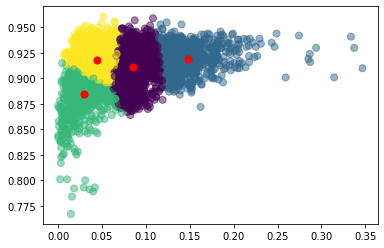

In [68]:
#Ploteamos los centroides de cada grupo:

plt.scatter(df['x'], df['y'], c=kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50, label = 'centroids')
plt.show()

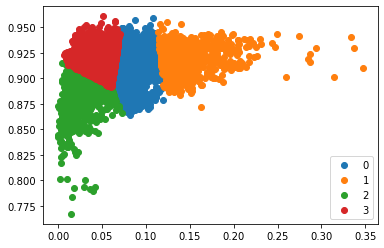

In [69]:
#Ploteamos cada grupo:

fig, ax = plt.subplots()
scatter_x = np.array(DF_J_and_C["tfidf_cosine"])
scatter_y = np.array(DF_J_and_C['WMD_Job_Desc'])
group = np.array(kmeans.labels_)
for g in np.unique(group):
    i = np.where(group == g)
    ax.scatter(scatter_x[i], scatter_y[i], label=g)
ax.legend()
plt.show()

In [70]:
#Añadimos la columna al DF:
new_column =  kmeans.labels_
DF_J_and_C['Result K-means'] = new_column
DF_J_and_C

<ipython-input-70-fa9fc6aa1310>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_J_and_C['Result K-means'] = new_column


,Candidate_Name,Job_Title,tfidf_cosine,WMD_Job_Desc,Result K-means
10,DataScientist_Rahul_Malik,Data Scientist,0.049701,0.905,3
11,DataScientist_Rahul_Malik,Data Scientist 2,0.112083,0.914,0
12,DataScientist_Rahul_Malik,HCM Consultant,0.022950,0.883,2
14,DataScientist_Rahul_Malik,Machine Learning Engineer,0.052490,0.912,3
15,DataScientist_Rahul_Malik,Machine Learning Engineer 2,0.057858,0.905,3
...,...,...,...,...,...
6245,386-CONSULTANT,Machine Learning Engineer 2,0.041610,0.927,3
6246,386-CONSULTANT,Security Specialist,0.071639,0.937,0
6247,386-CONSULTANT,Security Specialist 2,0.041386,0.910,3
6248,386-CONSULTANT,Web Developer Full Stack,0.029146,0.910,3


In [71]:
DF_J_and_C.tail(20)

new_df =  DF_J_and_C[(DF_J_and_C['Result K-means']==3) | (DF_J_and_C['Result K-means']==0)]
new_df

,Candidate_Name,Job_Title,tfidf_cosine,WMD_Job_Desc,Result K-means
10,DataScientist_Rahul_Malik,Data Scientist,0.049701,0.905,3
11,DataScientist_Rahul_Malik,Data Scientist 2,0.112083,0.914,0
14,DataScientist_Rahul_Malik,Machine Learning Engineer,0.052490,0.912,3
15,DataScientist_Rahul_Malik,Machine Learning Engineer 2,0.057858,0.905,3
16,DataScientist_Rahul_Malik,Security Specialist,0.007697,0.924,3
...,...,...,...,...,...
6245,386-CONSULTANT,Machine Learning Engineer 2,0.041610,0.927,3
6246,386-CONSULTANT,Security Specialist,0.071639,0.937,0
6247,386-CONSULTANT,Security Specialist 2,0.041386,0.910,3
6248,386-CONSULTANT,Web Developer Full Stack,0.029146,0.910,3


In [77]:
is_Bradly_Johnston =  DF_J_and_C['Candidate_Name']=='WebDev_Karen_Higgins'
new_DF = DF_J_and_C[is_Bradly_Johnston]
print(new_DF.shape)
new_DF

(9, 5)


,Candidate_Name,Job_Title,tfidf_cosine,WMD_Job_Desc,Result K-means
90,WebDev_Karen_Higgins,Data Scientist,0.066744,0.927,3
91,WebDev_Karen_Higgins,Data Scientist 2,0.064673,0.925,3
92,WebDev_Karen_Higgins,HCM Consultant,0.050826,0.891,2
94,WebDev_Karen_Higgins,Machine Learning Engineer,0.070888,0.928,0
95,WebDev_Karen_Higgins,Machine Learning Engineer 2,0.058246,0.927,3
96,WebDev_Karen_Higgins,Security Specialist,0.068370,0.937,3
97,WebDev_Karen_Higgins,Security Specialist 2,0.045120,0.920,3
98,WebDev_Karen_Higgins,Web Developer Full Stack,0.070749,0.911,0
99,WebDev_Karen_Higgins,Web Developer Full Stack 2,0.098643,0.942,0


## 2-Aplicando KNN.

In [78]:
#En X colocamos únicamente las features numéricas 'Cosine_Job_Desc' y 'WMD_Job_Desc' para predecir la variable Y.
x_data = DF_J_and_C.drop(["Candidate_Name","Job_Title","Result K-means"],axis=1)

#En Y colocaremos nuestra variable a predecir / nuestro "target", 'Result K-means':
y = DF_J_and_C['Result K-means']

In [79]:
x_data

,tfidf_cosine,WMD_Job_Desc
10,0.049701,0.905
11,0.112083,0.914
12,0.022950,0.883
14,0.052490,0.912
15,0.057858,0.905
...,...,...
6245,0.041610,0.927
6246,0.071639,0.937
6247,0.041386,0.910
6248,0.029146,0.910


In [80]:
y

10      3
11      0
12      2
14      3
15      3
       ..
6245    3
6246    0
6247    3
6248    3
6249    3
Name: Result K-means, Length: 5607, dtype: int32

In [81]:
#KNN librerias:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

#Entrenamiento... separamos 20% test y 80% para entrenamiento:
X_train,X_test,y_train,y_test = train_test_split(x_data,y,test_size=0.2,random_state=4)

In [93]:
#seleccionar el K óptimo para utilizar nuestro algoritmo. Para esto entrenamos al algoritmo K veces 
#y nos quedamos con el modelo que nos dé la mejor predicción (el mejor score).

#Como vimos previamente, dependiendo del valor de K el algoritmo se compartaba de mejor o peor manera. 
#Vamos a realizar un barrido para los distintos valores de K (del 1 al 25).
#Y así, para cada uno de estos valores de K vamos a entrenar al algoritmo y así vamos a obtener la exactitud/score del algoritmo:

k_range = range(1,50) #Valores de K (1-50)
scores = {}
scores_list = []
for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k) #Llamamos al modelo de clasificación (KNN) y le pasamos cada valor de K. 
        knn.fit(X_train,y_train) #Se va a entrenar al algorimo para ese K con los x_train e Y_train que elegimos previamente.
        y_pred=knn.predict(X_test) #Y ahora hacemos una predicción con los X_Test... lo mismo que haciamos con RL.
        scores[k] = metrics.accuracy_score(y_test,y_pred) #Después calculamos y guardamos el score de esa predicción con ese valor de K.
        scores_list.append(scores[k]) #Y esa predicción la metemos en una lista.

Text(0, 0.5, 'Testing Accuracy')

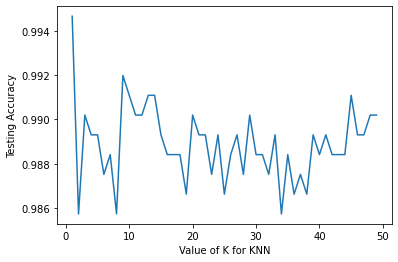

In [94]:
#Ahora graficamos y vemos la relación entre los K y la exactitud/score del algoritmo:
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [236]:
#Elegimos un K=9 ya que vemos que allí la eficiencia es del 0,92% (Alta) y nuestro algoritmo predecirá bien.

### 2.1-Entrenamos al algoritmo de KNN con un K óptimo (K=9)

In [95]:
k_Optimo=9
knn = KNeighborsClassifier(n_neighbors=k_Optimo) #Le asignamos este k=2.
knn.fit(X_train,y_train) #Se va a entrenar al algorimo para ese K=2 con los x_train
#e Y_train que elegimos previamente.
y_pred=knn.predict(X_test) #Y ahora hacemos una predicción con los X_Test.
score = metrics.accuracy_score(y_test,y_pred) #Cálculo del score para k=2

print("Precisión de KNN con K optimo:",score) #printeamos el score.

Precisión de KNN con K optimo: 0.9919786096256684


In [99]:
#Exportamos el modelo KNN para usarlo en 3-New_Candidate_&_New_Job_Description:
import pickle

# save the model to disk
pickle.dump(knn, open('model_knn.sav', 'wb'))

### 3-Prediciendo con knn, agregando nuevos Candidatos y nuevas Descripciones de Puestos.

Ahora vamos a analizar qué funciones llamar al agregarse un nuevo Candidato y un nuevo Job Description.
Luego de entrenar nuestro modelo vamos a PREDECIR con estas posición "HCM Consultant 2" para todos los Candidatos y con la Candidata "Data_Scientist_Karla_Lewis" (simulamos agregar una posición y una candidata). 

In [100]:
import pickle

# Cargamos el modelo de knn:
knn_model_loaded = pickle.load(open('model_knn.sav', 'rb'))

##### 3.1-¿Qué pasa al añadir un nuevo Candidato (Data_Scientist_Karla_Lewis)? ¿Qué se tiene que volver a calcular?
##### DF_Karla_Lewis

In [101]:
#Al agregar un nuevo candidato (aplica al puesto) se calcula el WMD y Cosine y se PREDICE con este modelo de KNN. 
#En esta predicción te clasifica de acuerdo a las 5 categorías que creamos con k-means.

#DF_Karla_Lewis

x_predict_karla = DF_Karla_Lewis.drop(["Candidate_Name","Job_Title"],axis=1)
x_predict_karla

,tfidf_cosine,WMD_Job_Desc
0,0.060513,0.898
1,0.115418,0.903
2,0.021795,0.884
3,0.019523,0.905
4,0.051246,0.896
5,0.046993,0.903
6,0.008459,0.909
7,0.024099,0.895
8,0.014167,0.885
9,0.023512,0.911


In [102]:
y_pred=knn.predict(x_predict_karla)
y_pred

array([3, 0, 2, 2, 2, 3, 2, 2, 2, 3], dtype=int32)

In [103]:
len(y_pred)

10

In [104]:
#Añadimos la columna al DF:
new_column =  y_pred
DF_Karla_Lewis['Result KNN'] = new_column
DF_Karla_Lewis

<ipython-input-104-4a07ab06c151>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_Karla_Lewis['Result KNN'] = new_column


,Candidate_Name,Job_Title,tfidf_cosine,WMD_Job_Desc,Result KNN
0,DataScientist_Karla_Lewis,Data Scientist,0.060513,0.898,3
1,DataScientist_Karla_Lewis,Data Scientist 2,0.115418,0.903,0
2,DataScientist_Karla_Lewis,HCM Consultant,0.021795,0.884,2
3,DataScientist_Karla_Lewis,HCM Consultant 2,0.019523,0.905,2
4,DataScientist_Karla_Lewis,Machine Learning Engineer,0.051246,0.896,2
5,DataScientist_Karla_Lewis,Machine Learning Engineer 2,0.046993,0.903,3
6,DataScientist_Karla_Lewis,Security Specialist,0.008459,0.909,2
7,DataScientist_Karla_Lewis,Security Specialist 2,0.024099,0.895,2
8,DataScientist_Karla_Lewis,Web Developer Full Stack,0.014167,0.885,2
9,DataScientist_Karla_Lewis,Web Developer Full Stack 2,0.023512,0.911,3


##### 3.2¿Qué pasa al añadir un nuevo Job Description (HCM Consultant 2)? ¿Qué se tiene que volver a calcular?

##### DF_HCM_C_2

In [105]:
#No pasa nada hasta que un Candidato aplica al puesto... y ahi pasa lo exṕlicado anteriormente en el punto 3 (justo arriba VER)

#DF_HCM_C_2

x_predict_HCM_C_2 = DF_HCM_C_2.drop(["Candidate_Name","Job_Title"],axis=1)
x_predict_HCM_C_2

,tfidf_cosine,WMD_Job_Desc
3,0.019523,0.905
13,0.010932,0.898
23,0.367655,0.932
33,0.131076,0.935
43,0.058595,0.923
...,...,...
6203,0.033420,0.904
6213,0.064672,0.898
6223,0.109822,0.933
6233,0.073963,0.923


In [106]:
#x_predict_HCM_C_2

y_pred=knn.predict(x_predict_HCM_C_2)
y_pred

array([2, 2, 1, 1, 3, 3, 3, 3, 2, 3, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 2, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 3, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 2, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 3, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 3, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 2,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 3, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 3, 2, 3, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 0, 1, 3, 3, 2, 0, 2, 3, 3, 3, 3, 3, 0, 3, 0, 0, 2, 2, 2,
       2, 3, 2, 3, 0, 2, 0, 0, 1, 0, 0, 3, 2, 2, 3,

In [107]:
len(y_pred)

625

In [108]:
#Añadimos la columna al DF:
new_column =  y_pred
DF_HCM_C_2['Result KNN'] = new_column
DF_HCM_C_2

<ipython-input-108-eb53d5f9647a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DF_HCM_C_2['Result KNN'] = new_column


,Candidate_Name,Job_Title,tfidf_cosine,WMD_Job_Desc,Result KNN
3,DataScientist_Karla_Lewis,HCM Consultant 2,0.019523,0.905,2
13,DataScientist_Rahul_Malik,HCM Consultant 2,0.010932,0.898,2
23,HCM_Federico_Calonge,HCM Consultant 2,0.367655,0.932,1
33,HCM_Robert_Smith,HCM Consultant 2,0.131076,0.935,1
43,MLEngineer_Bradly_Johnston,HCM Consultant 2,0.058595,0.923,3
...,...,...,...,...,...
6203,382-CONSULTANT,HCM Consultant 2,0.033420,0.904,3
6213,383-CONSULTANT,HCM Consultant 2,0.064672,0.898,0
6223,384-CONSULTANT,HCM Consultant 2,0.109822,0.933,0
6233,385-CONSULTANT,HCM Consultant 2,0.073963,0.923,0


In [109]:
#Conclusión: me dieron resultados esperables las predicciones.